# Analyse COVID-19

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Fetching calculated data

In [2]:
df_dataset = pd.read_csv('dataset.csv', index_col=0)

In [3]:
df_dataset

,country,date,case,death,population,density,size,ratio,ratio_death,start_date,start_death_date,age,age_death
1540.0,China,2020-01-22,548.0,17.0,1439323.774,153.311826,9388211.0,0.038073,0.001181,2020-01-30,2020-01-22,-8.0,0.0
1541.0,China,2020-01-23,643.0,18.0,1439323.774,153.311826,9388211.0,0.044674,0.001251,2020-01-30,2020-01-22,-7.0,1.0
1542.0,China,2020-01-24,920.0,26.0,1439323.774,153.311826,9388211.0,0.063919,0.001806,2020-01-30,2020-01-22,-6.0,2.0
1543.0,China,2020-01-25,1406.0,42.0,1439323.774,153.311826,9388211.0,0.097685,0.002918,2020-01-30,2020-01-22,-5.0,3.0
1544.0,China,2020-01-26,2075.0,56.0,1439323.774,153.311826,9388211.0,0.144165,0.003891,2020-01-30,2020-01-22,-4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8301.0,United Kingdom,2020-03-13,802.0,8.0,67886.004,280.601844,241930.0,1.181392,0.011784,2020-03-10,2020-03-14,3.0,-1.0
8302.0,United Kingdom,2020-03-14,1144.0,21.0,67886.004,280.601844,241930.0,1.685178,0.030934,2020-03-10,2020-03-14,4.0,0.0
8303.0,United Kingdom,2020-03-15,1145.0,21.0,67886.004,280.601844,241930.0,1.686651,0.030934,2020-03-10,2020-03-14,5.0,1.0
8304.0,United Kingdom,2020-03-16,1551.0,56.0,67886.004,280.601844,241930.0,2.284712,0.082491,2020-03-10,2020-03-14,6.0,2.0


## Filtering the countries

In [4]:
filtered_countries = ['China','US','France', 'Italy','Spain','Germany','South Korea', 'Japan', 'Iran']

In [5]:
colors = ['b','g','r','c','m','y','k','#ff00ff', '#00dd00']

# Dynamics

In [6]:
df_dynamics = df_dataset[['country','ratio_death','age_death']]

In [7]:
df_dynamics_t = df_dynamics.pivot(index='age_death',columns='country',values='ratio_death')

In [8]:
df_dynamics_plot = df_dynamics_t.loc[range(-20,50),filtered_countries]

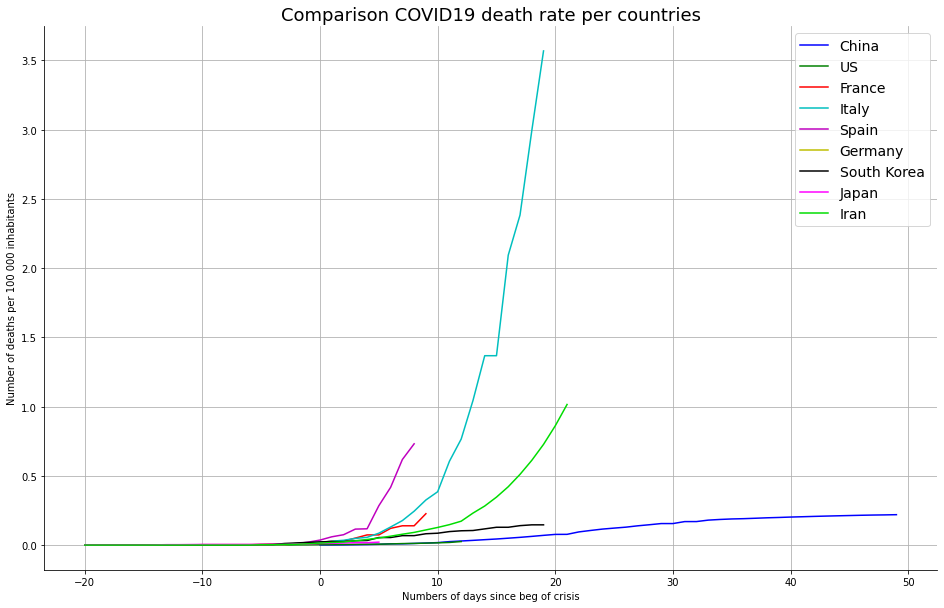

In [9]:
ax=df_dynamics_plot.plot(kind='line', figsize=(16,10), color=colors)
plt.title("Comparison COVID19 death rate per countries", fontsize=18)
plt.xlabel("Numbers of days since beg of crisis")
plt.ylabel("Number of deaths per 100 000 inhabitants")
plt.legend(fontsize=14)
plt.grid()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("death_ratio.png")
plt.show() 

In [10]:
df_dynamics_vol = df_dataset[['country','death','age_death']]

In [11]:
df_dynamics_vol_t = df_dynamics_vol.pivot(index='age_death',columns='country',values='death')
df_dynamics_vol_plot = df_dynamics_vol_t.loc[range(-20,50),filtered_countries]

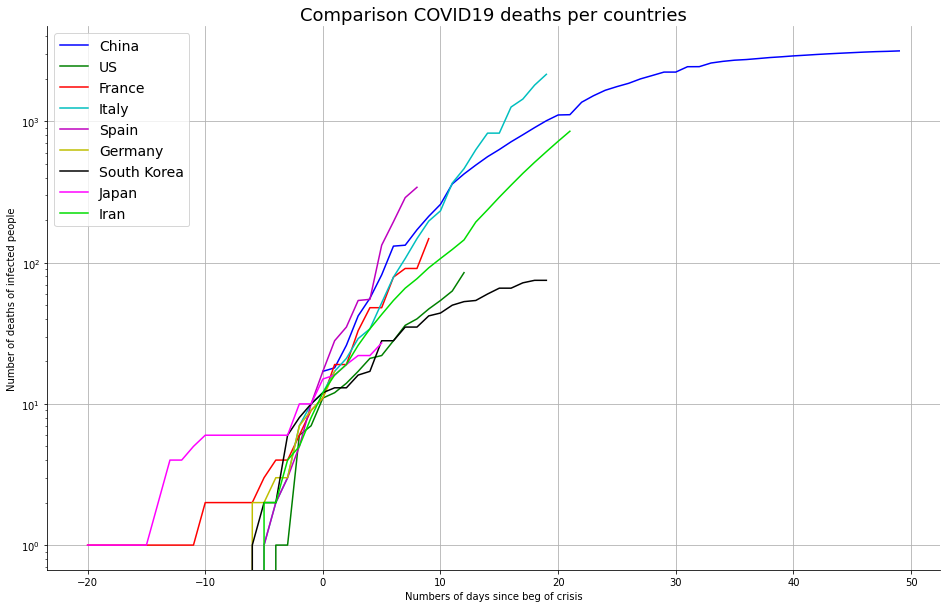

In [12]:
ax_vol=df_dynamics_vol_plot.plot(kind='line', figsize=(16,10), color= colors)
plt.title("Comparison COVID19 deaths per countries", fontsize=18)
plt.xlabel("Numbers of days since beg of crisis")
plt.ylabel("Number of deaths of infected people")
plt.legend(fontsize=14)
plt.grid()
ax_vol.spines['top'].set_visible(False)
ax_vol.spines['right'].set_visible(False)
ax_vol.set_yscale('log')
plt.savefig("death.png")
plt.show() 

## Death rate
Should be stable.
Increase shows lack of testing of population or saturation of healthcare capacities

In [13]:
df_dataset['DR']=df_dataset['death']/df_dataset['case']

In [14]:
df_death_rate = df_dataset[['country','age_death', 'DR']]

In [15]:
df_death_rate_pivot = df_death_rate.pivot(index='age_death',columns='country',values='DR').loc[range(0,50),filtered_countries]

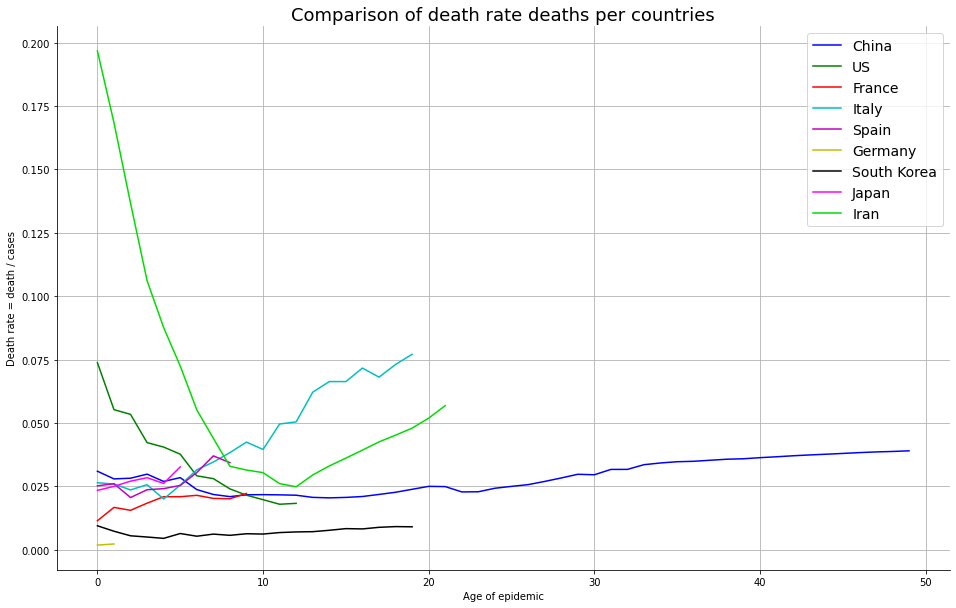

In [16]:
ax_vol=df_death_rate_pivot.plot(kind='line', figsize=(16,10), color= colors)
plt.title("Comparison of death rate deaths per countries", fontsize=18)
plt.xlabel("Age of epidemic")
plt.ylabel("Death rate = death / cases")
plt.legend(fontsize=14)
plt.grid()
ax_vol.spines['top'].set_visible(False)
ax_vol.spines['right'].set_visible(False)
plt.savefig("death_rate.png")
plt.show() 